<a href="https://colab.research.google.com/github/oleksandragolub/Progetto-Machine-Learning/blob/main/progetto_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
print("caricamento di librerie")
print("Pandas, NumPy per la gestione dei dati")
print("Matplotlib, Seaborn per la visualizzazione dei dati")
print("Scikit-learn per la modellazione e la valutazione dei modelli di ML")

!pip install kagglehub
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

caricamento di librerie
Pandas, NumPy per la gestione dei dati
Matplotlib, Seaborn per la visualizzazione dei dati
Scikit-learn per la modellazione e la valutazione dei modelli di ML


In [113]:
dataset_path = kagglehub.dataset_download("lara311/diabetes-dataset-using-many-medical-metrics")

print("Il dataset è stato scaricato in:", dataset_path)

dataset_path = "/root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1"

# Lista dei file nel dataset
print(os.listdir(dataset_path))

df = pd.read_csv(dataset_path + "/diabetes (1).csv")

Il dataset è stato scaricato in: /root/.cache/kagglehub/datasets/lara311/diabetes-dataset-using-many-medical-metrics/versions/1
['diabetes (1).csv']


In [114]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [115]:
# Mostra le prime righe del dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
# Controllare se il dataset è bilanciato
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


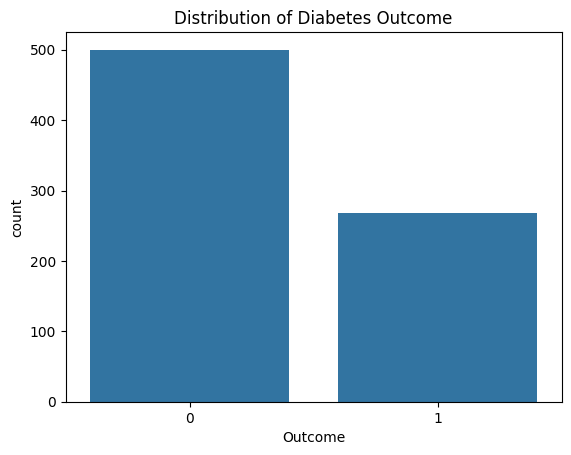

In [117]:
# Visualize the distribution of the target variable
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

In [118]:
# Controllare la presenza di valori mancanti ovvero nulli
missing_values = df.isnull().sum()
print("Valori nulli:\n", missing_values)

if missing_values.sum() > 0:
    df.fillna(df.median(), inplace=True)  # Sostituiamo i valori nulli con la mediana delle colonne

# Controllare i duplicati
duplicates = df.duplicated().sum()
print(f"Numero di righe duplicate: {duplicates}")

# Rimuovere eventuali duplicati
if duplicates > 0:
    df = df.drop_duplicates()

Valori nulli:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Numero di righe duplicate: 0


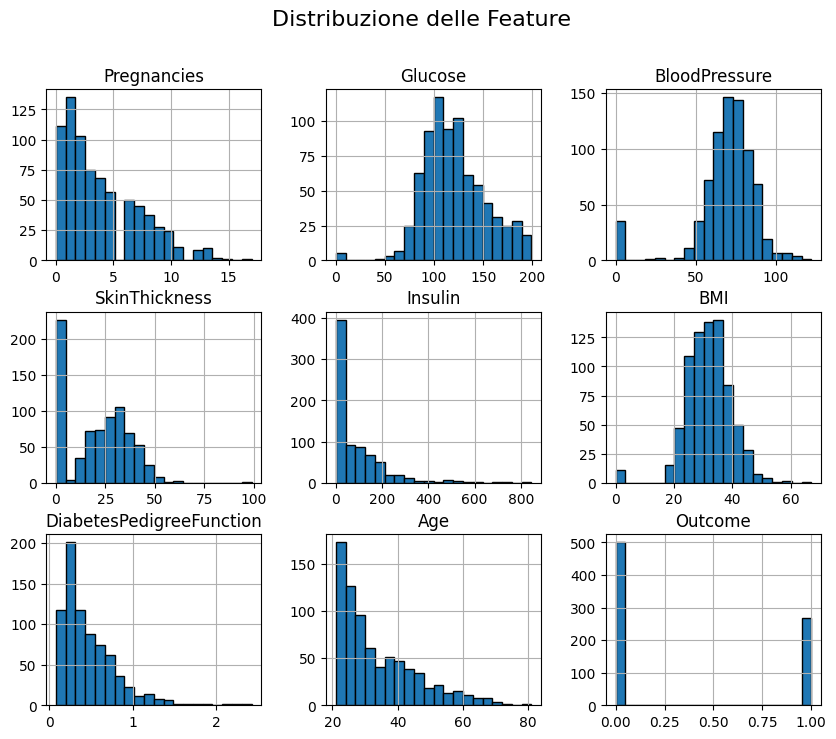

In [119]:
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribuzione delle Feature', fontsize=16)
plt.show()

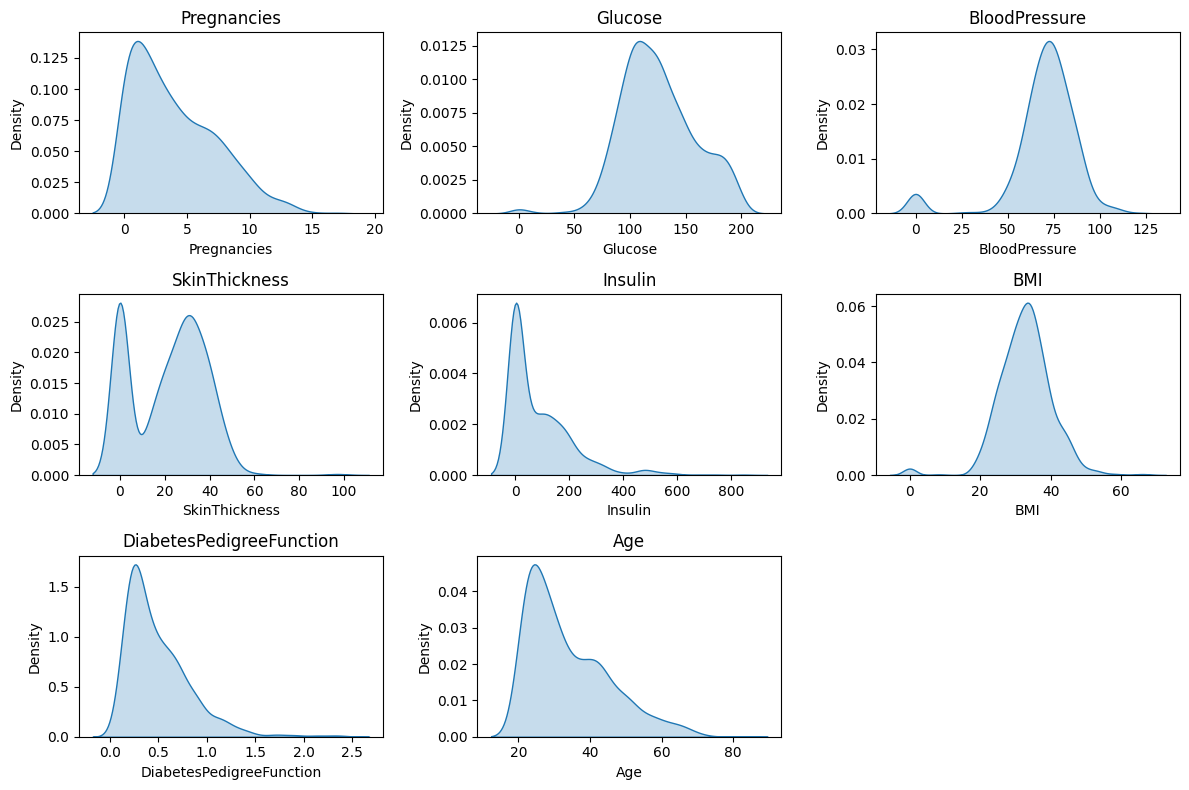

In [120]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_resampled.columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=X_resampled, x=col, fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()


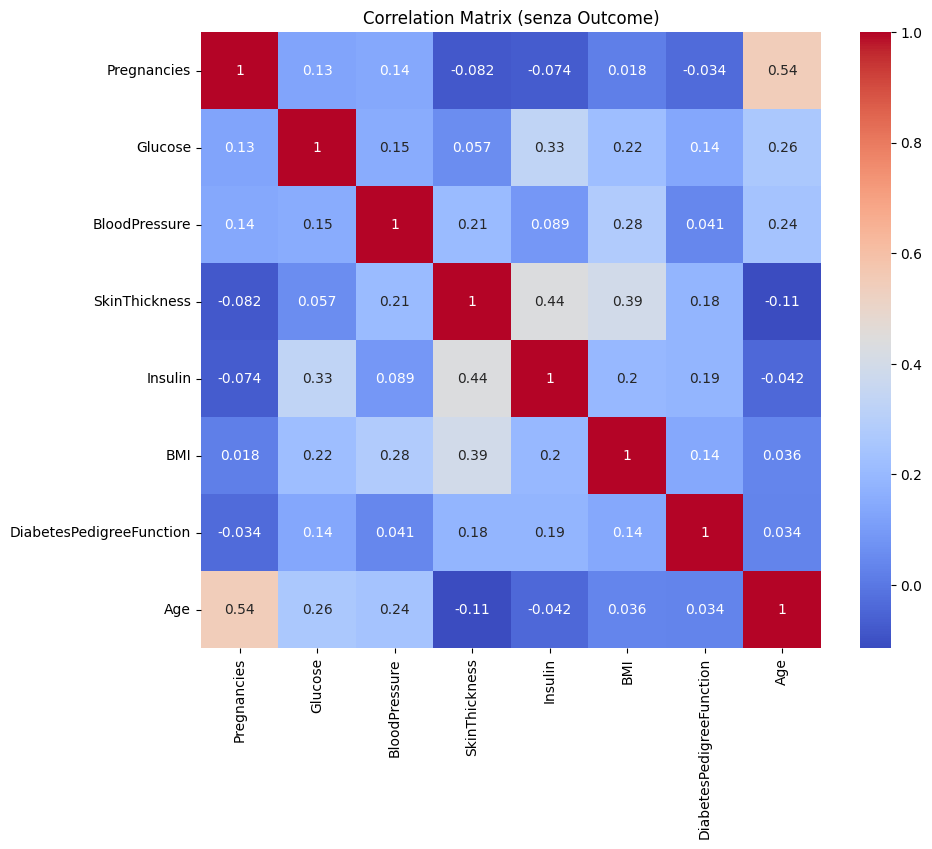

In [121]:
# Visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=["Outcome"]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (senza Outcome)')
plt.show()

In [122]:
########################################################################################## DATASET CON SMOTE ############################################################################################


# Separare le feature (X) e il target (y)
X = df.drop(columns=["Outcome"])  # Rimuove la colonna target e lascia solo le feature
y = df["Outcome"]  # La colonna target

# Applicare SMOTE per bilanciare il dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Controllare la nuova distribuzione delle classi
print(y_resampled.value_counts())  # Ora le classi dovrebbero essere bilanciate

# Dopo SMOTE, i dati bilanciati sono X_resampled e y_resampled

Outcome
1    500
0    500
Name: count, dtype: int64


In [123]:
# Dataset information
pd.DataFrame(X_resampled, columns=X.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   int64  
 2   BloodPressure             1000 non-null   int64  
 3   SkinThickness             1000 non-null   int64  
 4   Insulin                   1000 non-null   int64  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


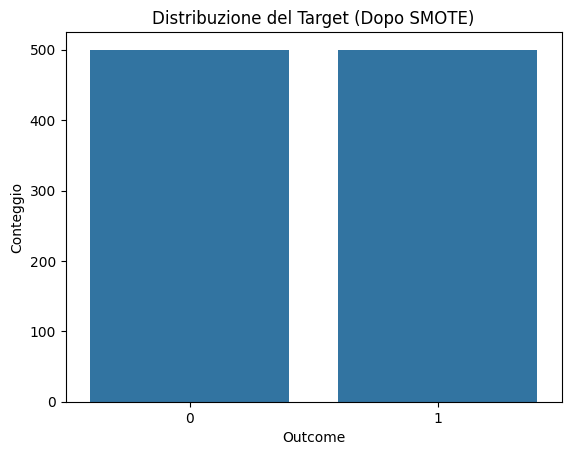

In [124]:
# Visualizzare la distribuzione del target bilanciato (y_resampled)
sns.countplot(x=pd.DataFrame(y_resampled, columns=["Outcome"])["Outcome"])
plt.title('Distribuzione del Target (Dopo SMOTE)')
plt.xlabel('Outcome')
plt.ylabel('Conteggio')
plt.show()

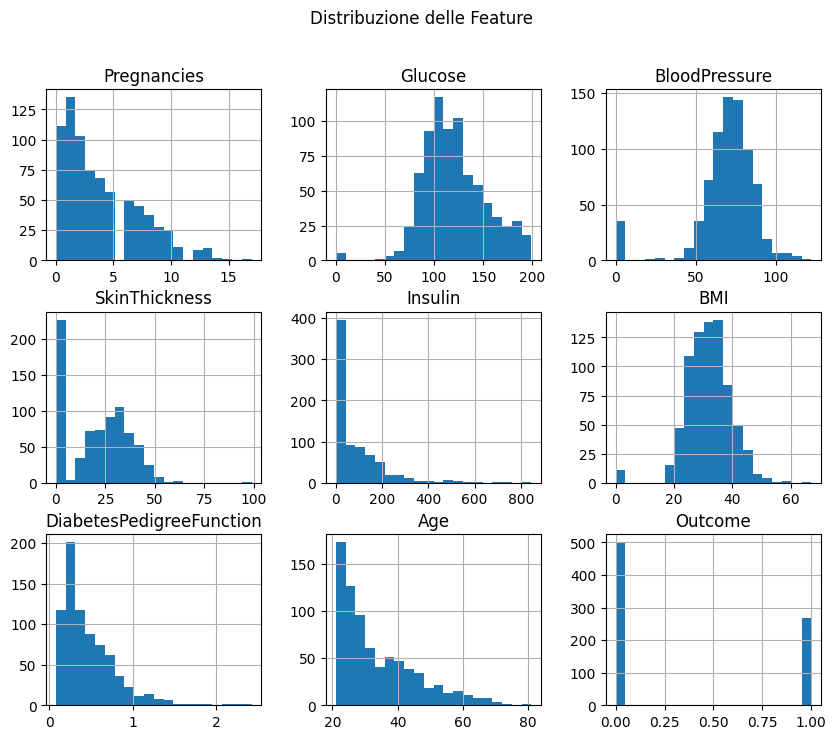

In [125]:
# Statistical summary
df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Distribuzione delle Feature')
plt.show()

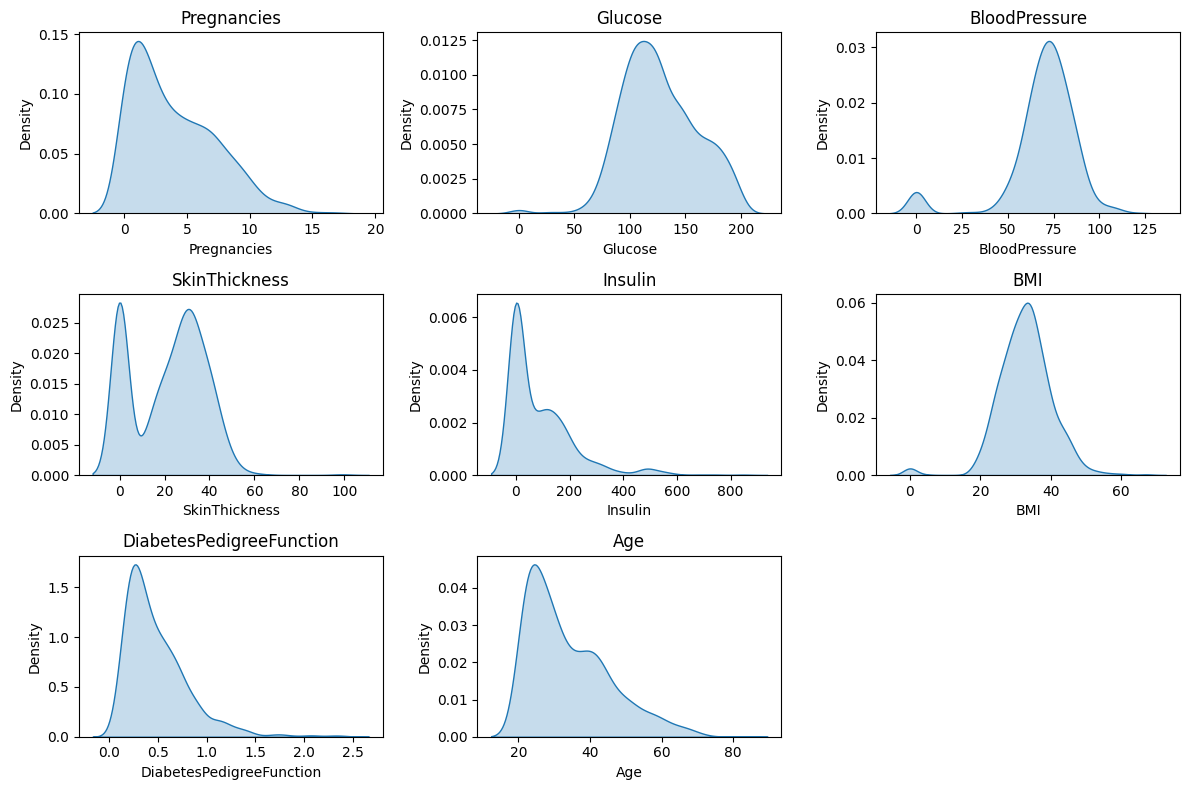

In [126]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_resampled.columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=pd.DataFrame(X_resampled, columns=X.columns), x=col, fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()

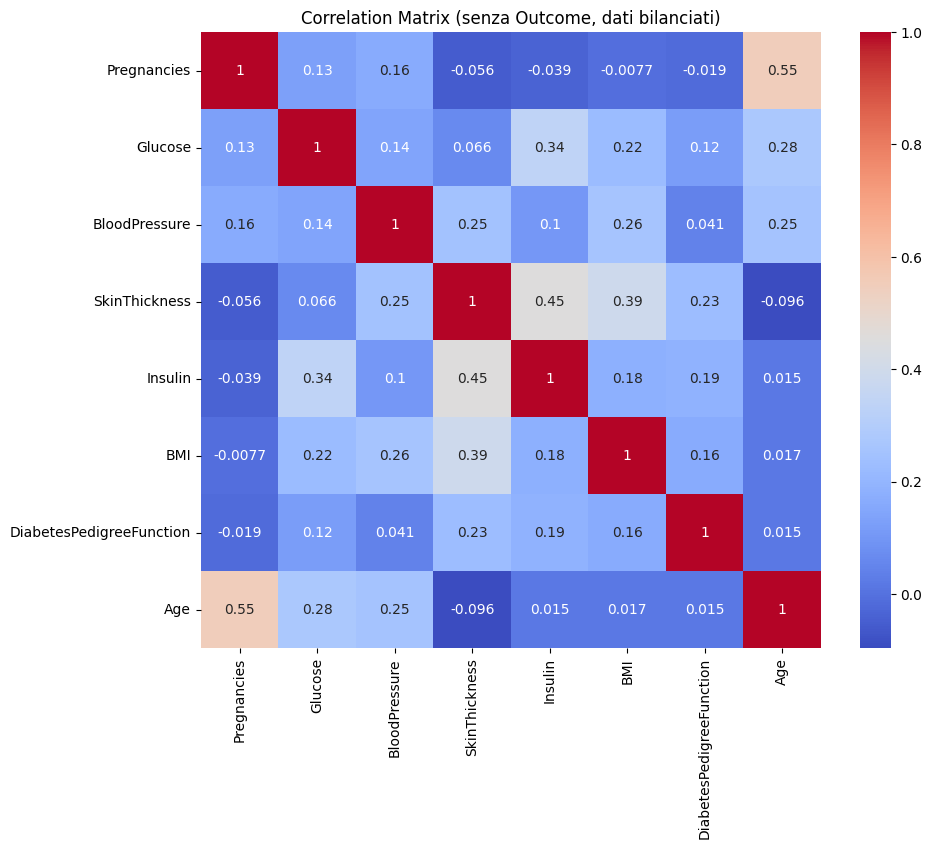

In [127]:
# Analizza solo i dati bilanciati, che saranno effettivamente usati nel training.

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_resampled, columns=X.columns).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (senza Outcome, dati bilanciati)')
plt.show()

In [128]:
# Controllare la presenza di valori mancanti (valori nulli) nel dataset
missing_values = df.isnull().sum()
print("Valori nulli:\n", missing_values)

# Percentuale di valori nulli per ogni colonna
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentuale di valori nulli:\n", missing_percentage)

Valori nulli:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Percentuale di valori nulli:
 Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


In [129]:
import numpy as np

# Sostituire gli zeri con NaN nelle colonne critiche
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

# Stampare il numero di valori nulli dopo la sostituzione
print("Valori nulli dopo aver sostituito gli zeri:\n", df.isnull().sum())

# Riempire i valori nulli con la mediana della colonna
df.fillna(df.median(), inplace=True)

# Controllare se ci sono ancora valori nulli
print("Valori nulli dopo la pulizia:\n", df.isnull().sum())


Valori nulli dopo aver sostituito gli zeri:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Valori nulli dopo la pulizia:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [103]:
# Controllare i duplicati
duplicates = df.duplicated().sum()
print(f"Numero di righe duplicate: {duplicates}")

# Rimuovere eventuali duplicati
if duplicates > 0:
    df = df.drop_duplicates()


Numero di righe duplicate: 0


In [86]:
# Feature and target separation
x = X_resampled
y = y_resampled

In [ ]:
# Scaling the features
# normalizza i dati per evitare problemi di scale diverse tra le feature
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [144]:
# Split the data into training and testing sets
# 70% Training, 30% Test
x_train, x_test, y_train, y_test = train_test_split(
    X_resampled_scaled, y_resampled, test_size=0.3, random_state=42
)


# 80% Training, 20% Test
#x_train, x_test, y_train, y_test = train_test_split(
#    X_resampled_scaled, y_resampled, test_size=0.2, random_state=42
#)

Numero di componenti principali selezionate: 8
Varianza spiegata da ciascuna componente: [0.28537316 0.18694722 0.14268806 0.11456572 0.09610793 0.06790947
 0.05855625 0.0478522 ]
Varianza cumulativa: [0.28537316 0.47232037 0.61500844 0.72957415 0.82568209 0.89359156
 0.9521478  1.        ]


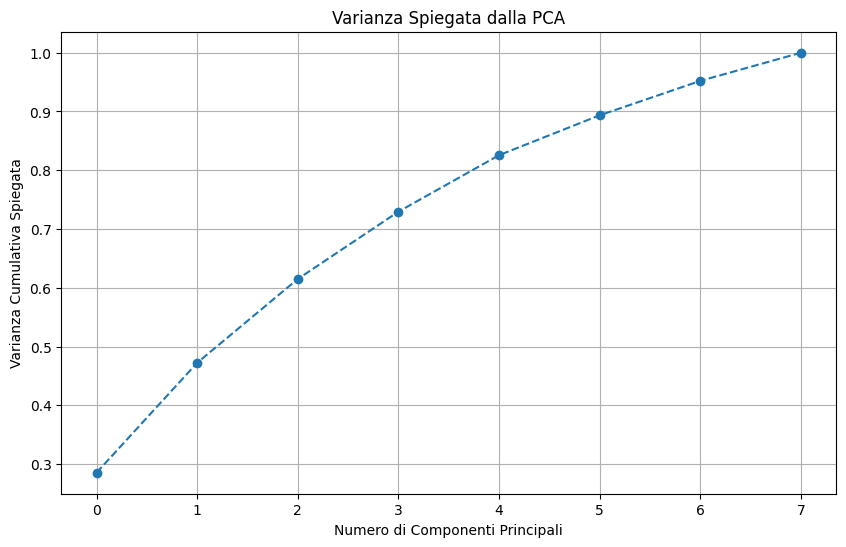

In [140]:
# NON USARE
# DANNEGGIA NOSTRO PROGETTO


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 3. Applicare PCA
# pca = PCA(n_components=0.99)  # Mantiene il 95% della varianza
# X_pca = pca.fit_transform(X_scaled)

pca = PCA(n_components=len(X_resampled.columns))  # Mantiene tutte le componenti principali
X_pca = pca.fit_transform(X_scaled)

# 4. Controllare quante componenti principali sono state mantenute
print(f"Numero di componenti principali selezionate: {X_pca.shape[1]}")

# Mostra la varianza spiegata da ogni componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza spiegata da ciascuna componente: {explained_variance}")

# Mostra il numero di componenti necessarie per raggiungere il 95% della varianza
cumulative_variance = np.cumsum(explained_variance)
print(f"Varianza cumulativa: {cumulative_variance}")

# 5. Visualizzare la varianza spiegata da ogni componente
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Cumulativa Spiegata')
plt.title('Varianza Spiegata dalla PCA')
plt.grid()
plt.show()

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
